In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
orig_data = pd.read_excel("OppScrData.xlsx")
for col in orig_data.columns:
    new_col = '_'.join(col.split())
    orig_data.rename(columns={col:new_col}, inplace=True)

In [133]:
data = orig_data[['Record_ID', 'Visit_ID', 'PT_ID','DEATH_[d_from_CT]','L1_HU_BMD',
       'TAT_Area_(cm2)', 'Total_Body_Area_EA_(cm2)', 'VAT_Area_(cm2)',
       'SAT_Area_(cm2)', 'VAT/SAT_Ratio', 'Muscle_HU', 'Muscle_Area_(cm2)',
       'L3_SMI_(cm2/m2)', 'AoCa_Agatston', 'Liver_HU_(Median)']]

col = 'Liver_HU_(Median)'
data[col] = pd.to_numeric(data[col], errors='coerce')
data[col] = data[col].astype(float)

# data['DEATH_[d_from_CT]'].fillna(5071, inplace=True)
# # data = data[(data['DEATH_[d_from_CT]']<=1825) | (data['DEATH_[d_from_CT]']>=3650)]
# data['death'] = np.where(data['DEATH_[d_from_CT]']<=5070,1,0)

msk = np.random.rand(data.shape[0]) < 0.8
train = data[msk]
test = data[~msk]

feats = ['L1_HU_BMD',
       'TAT_Area_(cm2)', 'Total_Body_Area_EA_(cm2)', 'VAT_Area_(cm2)',
       'SAT_Area_(cm2)', 'VAT/SAT_Ratio', 'Muscle_HU', 'Muscle_Area_(cm2)',
       'L3_SMI_(cm2/m2)', 'AoCa_Agatston', 'Liver_HU_(Median)']
label = 'death'

/var/folders/vj/qcl266c92812js646m8tcfgc0000gn/T/ipykernel_12352/973090420.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = pd.to_numeric(data[col], errors='coerce')
/var/folders/vj/qcl266c92812js646m8tcfgc0000gn/T/ipykernel_12352/973090420.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].astype(float)


## EDA

In [122]:
orig_data[~orig_data['DEATH_[d_from_CT]'].isna()].shape

(549, 115)

<AxesSubplot:ylabel='Frequency'>

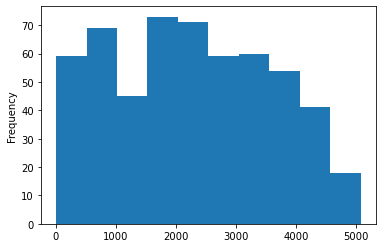

In [120]:
orig_data[orig_data['DEATH_[d_from_CT]']<5071]['DEATH_[d_from_CT]'].plot.hist()

In [90]:
train.groupby('death')['L1_HU_BMD',
       'TAT_Area_(cm2)', 'Total_Body_Area_EA_(cm2)', 'VAT_Area_(cm2)',
       'SAT_Area_(cm2)', 'VAT/SAT_Ratio', 'Muscle_HU', 'Muscle_Area_(cm2)',
       'L3_SMI_(cm2/m2)', 'AoCa_Agatston', 'Liver_HU_(Median)'].describe().T[48:]

/var/folders/vj/qcl266c92812js646m8tcfgc0000gn/T/ipykernel_12352/3844569056.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train.groupby('death')['L1_HU_BMD',


death                               0             1
Muscle_HU         count   7122.000000     39.000000
                  mean      29.277051     17.959249
                  std       11.992602     16.283023
                  min     -118.307532    -18.003310
                  25%       22.584768      6.859847
                  50%       31.041427     19.931802
                  75%       37.776270     27.836226
                  max       99.484949     54.114002
Muscle_Area_(cm2) count   7122.000000     39.000000
                  mean     154.369044    140.999729
                  std       43.256492     43.182986
                  min        9.376304     38.313354
                  25%      122.003265    112.699118
                  50%      147.655222    144.886871
                  75%      186.043769    173.386357
                  max      378.491765    231.515391
L3_SMI_(cm2/m2)   count   7047.000000     35.000000
                  mean      52.805568     47.520130
                  std       12.418854     14.135856
                  min        0.562102     14.392344
                  25%       44.471085     40.927373
                  50%       51.878866     48.413187
                  75%       60.766516     54.151315
                  max      139.815667     74.476463
AoCa_Agatston     count   7140.000000     40.000000
                  mean     639.650641   3765.079275
                  std     1655.711369   4795.384406
                  min        0.000000      0.000000
                  25%        0.000000    138.017250
                  50%       52.334000   1750.967500
                  75%      453.395250   5667.641000
                  max    36942.923000  21081.402000
Liver_HU_(Median) count   7092.000000     34.000000
                  mean      55.427806     52.029412
                  std       10.357698     13.732256
                  min       -8.000000     25.000000
                  25%       52.000000     46.250000
                  50%       58.000000     52.500000
                  75%       62.000000     57.500000
                  max       84.000000    105.000000

Record_ID


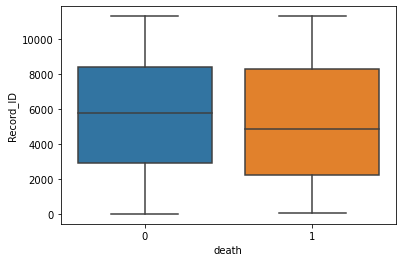

Visit_ID


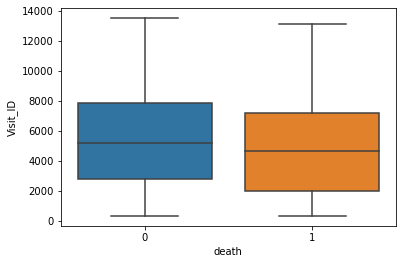

PT_ID


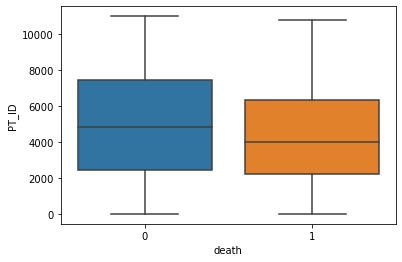

DEATH_[d_from_CT]


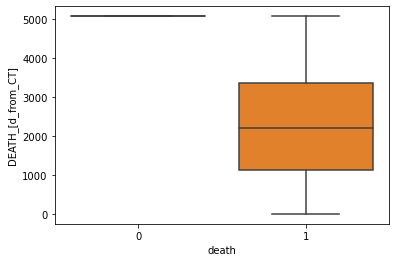

L1_HU_BMD


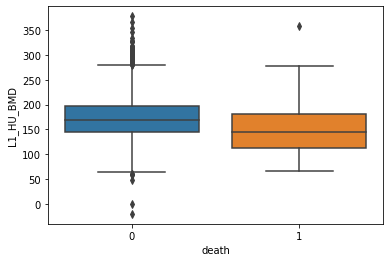

TAT_Area_(cm2)


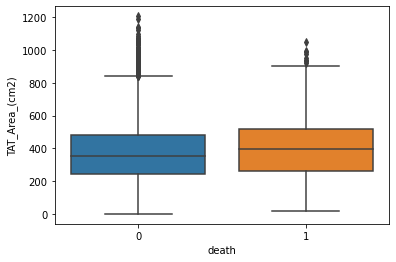

Total_Body_Area_EA_(cm2)


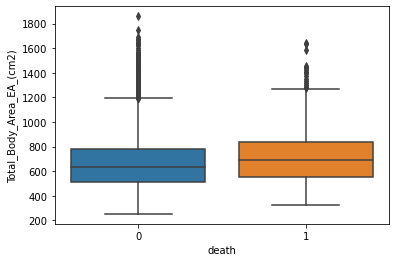

VAT_Area_(cm2)


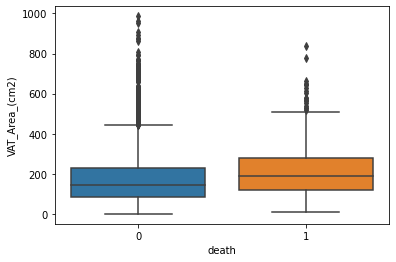

SAT_Area_(cm2)


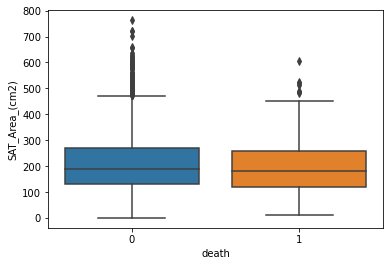

VAT/SAT_Ratio


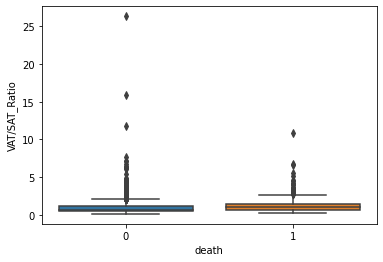

Muscle_HU


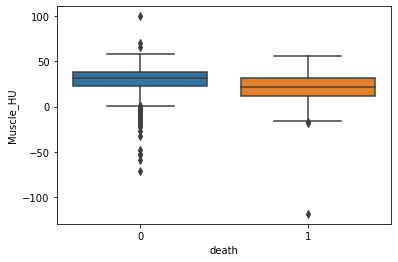

Muscle_Area_(cm2)


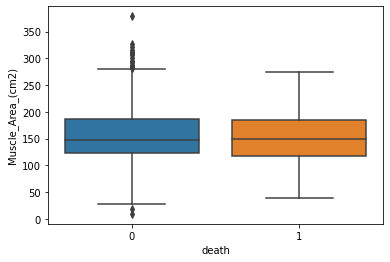

L3_SMI_(cm2/m2)


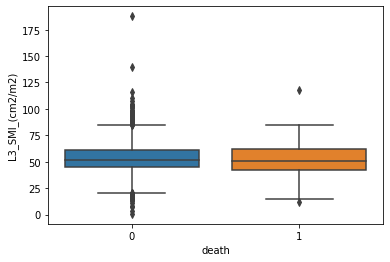

AoCa_Agatston


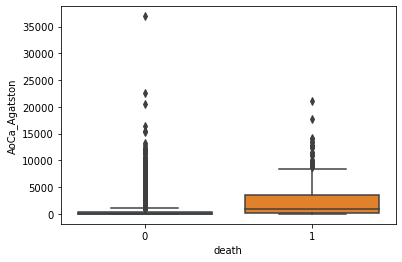

Liver_HU_(Median)


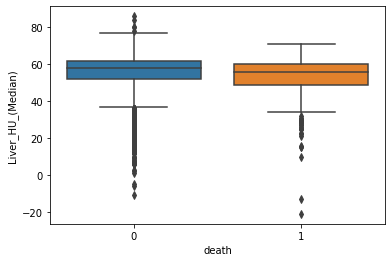

death


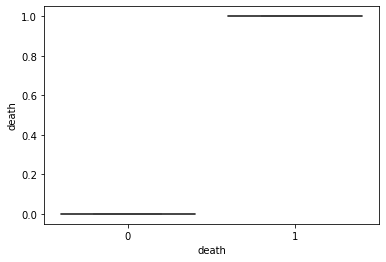

In [114]:
import seaborn as sns
for col in train.columns:
    print(col)
    sns.boxplot(x='death', y=col, data=train)
    plt.show()

In [ ]:
def scale(quantity):
    mn = quantity.min()
    mx = quantity.max()
    scaled_quantity = (quantity - mn)/(mx-mn)
    return scaled_quantity

tmp = data[~data['DEATH_[d_from_CT]'].isna()]
for col in feats:
    x1 = scale(tmp[col])
    x2 = scale(tmp['DEATH_[d_from_CT]'])
    x1 = x1.reindex()
    x2 = x2.reindex()
    sns.lineplot(data=tmp, x=col, y='DEATH_[d_from_CT]')
    plt.show()
    

# -----------------------------------------

In [115]:
na_dict = {}
for col in feats:
    mean = train[col].mean() 
    na_dict[col] = mean
    train[col].fillna(mean, inplace=True)

/Users/hsahu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [116]:
X_train = train[feats]
Y_train = train[label]

In [117]:
model = LogisticRegression(random_state=0).fit(X_train, Y_train)

/Users/hsahu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
for col in feats:
    test[col].fillna(na_dict[col], inplace=True)
X_test = test[feats]
Y_test = test[label]
preds = model.predict(X_test)
accuracy_score(Y_test, preds)


/Users/hsahu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


array([[1779,    5],
       [ 110,    5]])

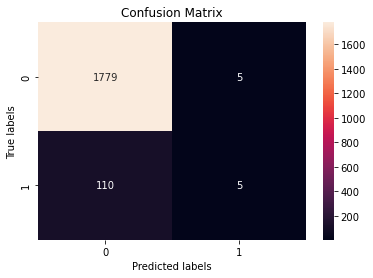

In [123]:
ax= plt.subplot()
cm = confusion_matrix(Y_test, preds)
labels = [0,1]
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); 
ax.yaxis.set_ticklabels(labels);

## Regression